In [1]:
from reinforce import ReinforceAgent, Categorical2D
from visualisation import draw_qap, draw_assignment_graph
from qap import GraphAssignmentProblem, AssignmentGraph
from torch_geometric.utils import from_networkx
import taskgenerators
import torch
from evaluate import random_assignment
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("testgraph.qap", "r") as f:
    qap = GraphAssignmentProblem.from_qaplib_string(f.read())

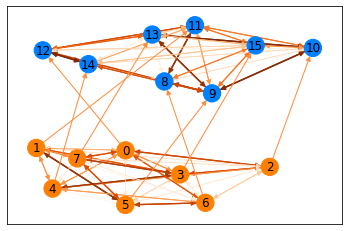

In [3]:
draw_qap(qap, random_assignment(qap))

In [4]:
agent = ReinforceAgent()
#agent.load_checkpoint("../runs/reinforce_transformer_random_graphs_1/checkpoint_end.pth")

In [5]:
data = agent.transform_initial_graph(qap.graph_source)
print(data)

Data(x=[8, 16], edge_index=[2, 56], edge_attr=[56, 16])


In [6]:
data.edge_attr

tensor([[0.0000, 0.1958, 0.2769, 0.0000, 0.0000, 0.0000, 0.5507, 0.0000, 0.2659,
         0.1300, 0.1272, 0.2985, 0.0000, 0.5938, 0.0000, 0.0253],
        [0.0000, 0.3155, 0.2083, 0.0000, 0.0000, 0.0371, 0.6278, 0.0000, 0.3265,
         0.2450, 0.3527, 0.3632, 0.0187, 0.5959, 0.0000, 0.0182],
        [0.0000, 0.2371, 0.2563, 0.0000, 0.0000, 0.0000, 0.5803, 0.0000, 0.2899,
         0.1723, 0.1965, 0.3076, 0.0000, 0.5871, 0.0000, 0.0153],
        [0.0000, 0.2276, 0.2616, 0.0000, 0.0000, 0.0000, 0.5741, 0.0000, 0.2856,
         0.1635, 0.1802, 0.3041, 0.0000, 0.5875, 0.0000, 0.0163],
        [0.0000, 0.1268, 0.3274, 0.0000, 0.0000, 0.0000, 0.4901, 0.0000, 0.2075,
         0.0299, 0.0000, 0.2929, 0.0000, 0.6193, 0.0447, 0.0645],
        [0.0000, 0.2994, 0.2163, 0.0000, 0.0000, 0.0110, 0.6157, 0.0000, 0.3114,
         0.2260, 0.3084, 0.3398, 0.0079, 0.5907, 0.0000, 0.0146],
        [0.0000, 0.3090, 0.2109, 0.0000, 0.0000, 0.0263, 0.6212, 0.0000, 0.3185,
         0.2356, 0.3319, 0.3518, 0.01

In [7]:
agent.solve_and_learn(qap)

(12.618520361512278, array([3., 6., 1., 5., 4., 2., 0., 7.]))

In [8]:
for param in agent.networks.parameters():
    print(torch.norm(param.grad))

tensor(0.0264)
tensor(0.0279)
tensor(0.1469)
tensor(0.0601)
tensor(0.0147)
tensor(0.0146)
tensor(0.0427)
tensor(0.0449)
tensor(0.0001)
tensor(9.1132e-11)
tensor(0.0003)
tensor(0.0007)
tensor(0.0280)
tensor(0.0658)
tensor(0.0677)
tensor(0.0300)
tensor(0.0658)
tensor(0.0001)
tensor(4.8526e-11)
tensor(0.0003)
tensor(0.0002)
tensor(0.0689)
tensor(0.0582)
tensor(0.0637)
tensor(0.0729)
tensor(0.0582)
tensor(0.2892)
tensor(0.1993)
tensor(0.0388)
tensor(3.6653e-07)
tensor(0.0555)
tensor(9.7689e-07)
tensor(0.0600)
tensor(2.3842e-07)
tensor(0.0010)
tensor(0.0017)
tensor(0.0017)
tensor(0.0045)
tensor(0.0044)
tensor(0.0103)


In [9]:
data_a = agent.transform_initial_graph(qap.graph_source)
data_b = agent.transform_initial_graph(qap.graph_target)

In [10]:
embeddings_a = agent.messaging_net(data_a.x, data_a.edge_index, data_a.edge_attr)
embeddings_b = agent.messaging_net(data_b.x, data_b.edge_index, data_b.edge_attr)

In [11]:
probabilities = agent.compute_link_probabilities(embeddings_a, embeddings_b)
print(probabilities)

tensor([[[-0.1740],
         [-0.1731],
         [-0.1739],
         [-0.1734],
         [-0.1738],
         [-0.1739],
         [-0.1739],
         [-0.1736]],

        [[-0.1741],
         [-0.1732],
         [-0.1740],
         [-0.1735],
         [-0.1739],
         [-0.1740],
         [-0.1740],
         [-0.1737]],

        [[-0.1741],
         [-0.1732],
         [-0.1740],
         [-0.1735],
         [-0.1739],
         [-0.1740],
         [-0.1740],
         [-0.1737]],

        [[-0.1738],
         [-0.1729],
         [-0.1737],
         [-0.1732],
         [-0.1736],
         [-0.1737],
         [-0.1738],
         [-0.1735]],

        [[-0.1741],
         [-0.1733],
         [-0.1740],
         [-0.1736],
         [-0.1739],
         [-0.1741],
         [-0.1741],
         [-0.1738]],

        [[-0.1740],
         [-0.1731],
         [-0.1739],
         [-0.1734],
         [-0.1738],
         [-0.1739],
         [-0.1739],
         [-0.1736]],

        [[-0.1741],
        

In [12]:
policy = Categorical2D(probabilities)

In [13]:
policy.distribution.probs

tensor([0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0156], grad_fn=<SoftmaxBackward0>)

In [14]:
embeddings_a

tensor([[0.0000, 0.1498, 0.0328, 0.1876, 0.0000, 0.0113, 0.0000, 0.1758, 0.1335,
         0.0736, 0.0000, 0.0000, 0.0243, 0.1944, 0.0000, 0.0838],
        [0.0000, 0.1539, 0.0285, 0.1862, 0.0000, 0.0126, 0.0000, 0.1798, 0.1263,
         0.0740, 0.0000, 0.0000, 0.0301, 0.1986, 0.0000, 0.0867],
        [0.0000, 0.1540, 0.0249, 0.1849, 0.0000, 0.0141, 0.0000, 0.1823, 0.1214,
         0.0733, 0.0000, 0.0000, 0.0336, 0.2007, 0.0000, 0.0875],
        [0.0000, 0.1503, 0.0321, 0.1875, 0.0000, 0.0091, 0.0000, 0.1741, 0.1380,
         0.0785, 0.0000, 0.0000, 0.0267, 0.1906, 0.0000, 0.0852],
        [0.0000, 0.1536, 0.0279, 0.1854, 0.0000, 0.0135, 0.0000, 0.1815, 0.1234,
         0.0725, 0.0000, 0.0000, 0.0312, 0.2004, 0.0000, 0.0858],
        [0.0000, 0.1579, 0.0232, 0.1849, 0.0000, 0.0124, 0.0000, 0.1813, 0.1231,
         0.0772, 0.0000, 0.0000, 0.0359, 0.1993, 0.0000, 0.0901],
        [0.0000, 0.1562, 0.0234, 0.1836, 0.0000, 0.0139, 0.0000, 0.1842, 0.1185,
         0.0727, 0.0000, 0.0000, 0.03

In [15]:
embeddings_b

tensor([[0.0000, 0.1550, 0.0246, 0.1850, 0.0000, 0.0132, 0.0000, 0.1811, 0.1240,
         0.0779, 0.0000, 0.0000, 0.0364, 0.1990, 0.0000, 0.0900],
        [0.0000, 0.1439, 0.0398, 0.1866, 0.0000, 0.0020, 0.0000, 0.1690, 0.1557,
         0.0871, 0.0000, 0.0000, 0.0263, 0.1786, 0.0000, 0.0825],
        [0.0000, 0.1549, 0.0270, 0.1862, 0.0000, 0.0120, 0.0000, 0.1789, 0.1280,
         0.0795, 0.0000, 0.0000, 0.0345, 0.1969, 0.0000, 0.0901],
        [0.0000, 0.1463, 0.0357, 0.1872, 0.0000, 0.0104, 0.0000, 0.1751, 0.1376,
         0.0755, 0.0000, 0.0000, 0.0247, 0.1921, 0.0000, 0.0831],
        [0.0000, 0.1537, 0.0284, 0.1865, 0.0000, 0.0108, 0.0000, 0.1769, 0.1318,
         0.0792, 0.0000, 0.0000, 0.0313, 0.1946, 0.0000, 0.0884],
        [0.0000, 0.1550, 0.0264, 0.1859, 0.0000, 0.0124, 0.0000, 0.1794, 0.1273,
         0.0789, 0.0000, 0.0000, 0.0345, 0.1975, 0.0000, 0.0899],
        [0.0000, 0.1534, 0.0256, 0.1852, 0.0000, 0.0137, 0.0000, 0.1814, 0.1237,
         0.0766, 0.0000, 0.0000, 0.03

<IPython.core.display.Javascript object>


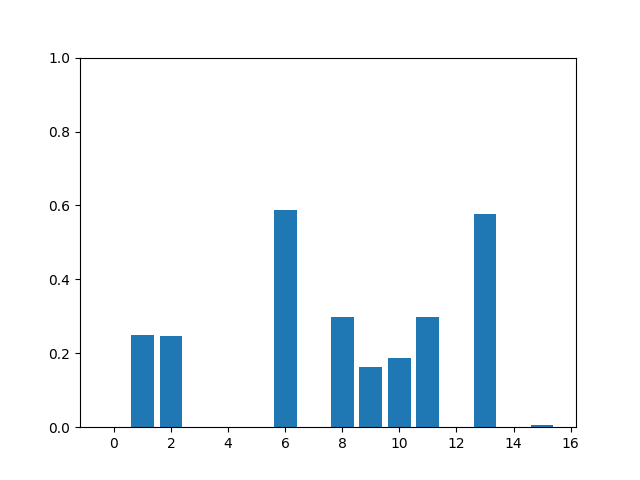

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0), FloatSlider(value=0.5, description='y'…

In [16]:
%matplotlib notebook
from ipywidgets import interact

fig,ax = plt.subplots()

@interact(x=(0.,1.), y=(0.,1.))
def show_edge_embedding(x, y):
    with torch.no_grad():
        embedding = agent.edge_embedding_net(torch.tensor([x,y]))
        ax.clear()
        ax.set_ylim(0,1)
        ax.bar(range(len(embedding)), embedding)
        
fig.show()

In [17]:
def print_parameter_gradients(x):
    agent.optimizer.zero_grad()
    x.backward(retain_graph=True)
    for param in agent.networks.parameters():
        print(torch.norm(param.grad))

In [18]:
print_parameter_gradients(embeddings_a[3,1])

tensor(0.0916)
tensor(0.1121)
tensor(0.5288)
tensor(0.2195)
tensor(0.0736)
tensor(0.0727)
tensor(0.1637)
tensor(0.1674)
tensor(4.7035e-06)
tensor(3.0529e-11)
tensor(9.2435e-05)
tensor(0.0002)
tensor(0.1250)
tensor(0.2675)
tensor(0.2850)
tensor(0.1288)
tensor(0.2675)
tensor(1.2676e-05)
tensor(1.9064e-11)
tensor(0.0004)
tensor(0.0003)
tensor(0.3414)
tensor(0.2803)
tensor(0.2966)
tensor(0.3443)
tensor(0.2803)
tensor(1.4753)
tensor(1.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
